# Introduction
In this notebook, we would be doing Exploratory Data Analysis (EDA) on the dataset, which involves examining and understanding the data before applying any machine learning algorithms or making any predictions. EDA allows us to gain insights, detect patterns, and identify relationships within the dataset.

# Summary of the dataset
This dataset contains medical and demographic data of patients along with their diabetes status, whether positive or negative. It consists of various features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level

# Summary of the columns
- **gender**: Gender refers to the classification of individuals as male or female. It is an important demographic factor that can influence various aspects of health and medical conditions. 



- **age**: Age represents the number of years a person has lived since birth. It provides insight into the individual's life stage, potential health risks, and susceptibility to certain diseases or conditions associated with specific age groups.



- **hypertension**: Hypertension, often referred to as high blood pressure, is a medical condition characterized by persistently elevated blood pressure in the arteries. It is a significant risk factor for various cardiovascular diseases and can lead to serious health complications if left unmanaged.



- **heart_disease**: Heart disease refers to a range of conditions affecting the heart, such as coronary artery disease, heart failure, or heart rhythm disorders. It is a broad term encompassing various cardiovascular disorders that can impact the overall functioning of the heart.



- **smoking_history**: Smoking history indicates whether an individual has a past or present habit of smoking tobacco products. Smoking is a well-known risk factor for numerous health problems, including respiratory diseases, cardiovascular diseases, and certain types of cancer.



- **bmi**: Body Mass Index (BMI) is a measure of body fat based on an individual's weight and height. It provides an estimation of whether a person's weight is within a healthy range or if they are underweight, overweight, or obese. BMI is commonly used as a screening tool for assessing the risk of weight-related health issues.



- **HbA1c_level**: HbA1c (Hemoglobin A1c) level is a laboratory test that measures the average blood sugar (glucose) levels over the past 2-3 months. It is commonly used in the diagnosis and management of diabetes. Higher HbA1c levels indicate poorer blood sugar control and may indicate the need for adjustments in diabetes treatment.



- **blood_glucose_level**: Blood glucose level refers to the concentration of glucose (sugar) in the bloodstream. It is an important indicator of an individual's blood sugar regulation. Abnormal blood glucose levels, either too high (hyperglycemia) or too low (hypoglycemia), can be associated with various health conditions, particularly diabetes.



- **diabetes**: Diabetes is a chronic medical condition characterized by elevated blood sugar levels due to insufficient insulin production or ineffective use of insulin in the body. It requires careful management and monitoring of blood sugar levels to prevent complications. Diabetes can have significant impacts on overall health and may require lifestyle modifications, medication, and regular medical care.

# Reading the dataset

In [1]:
import numpy as np 
import pandas as pd

In [2]:
df=pd.read_csv('diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
df.shape

(100000, 9)

In [4]:
df.size

900000

In [5]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [7]:
def hasNull(data):
    missing=data.columns[data.isnull().any()].tolist()
    return missing
if hasNull(df)==[]:
    print("No null values")
else:
    print(hasNull(df))

No null values


## Observation from above analysis:
- No null values in any of the columns.   
- Max values of BMI and Blood Glucose Level look too high for now, we have to check for outliers later.

## Exploratory Data Analysis

-> Here we divide the columns into 2 types based on their data types
- **Numerical** - age, bmi, HbA1c_level, blood_glucose_level.
- **Categorical** - hypertension, heart_disease,diabetes, gender, smoking_history.

### Univariate Analysis

- Univariate analysis focuses on analyzing each feature in the dataset independently.   
- Univariate analysis helps in identifying potential problems with the data such as outliers and missing values

### Numerical Data

#### Univariate analysis on age

In [8]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [9]:
df['age'].describe()

count    100000.000000
mean         41.885856
std          22.516840
min           0.080000
25%          24.000000
50%          43.000000
75%          60.000000
max          80.000000
Name: age, dtype: float64

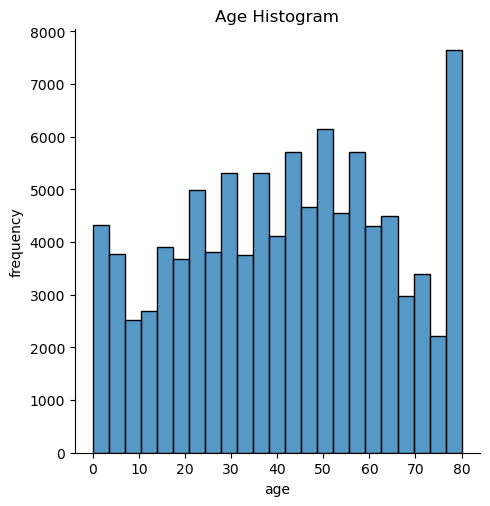

In [10]:
new=sns.displot(data=df['age'],kind='hist',bins=23)
new.set(title='Age Histogram',xlabel='age',ylabel='frequency')
plt.show()

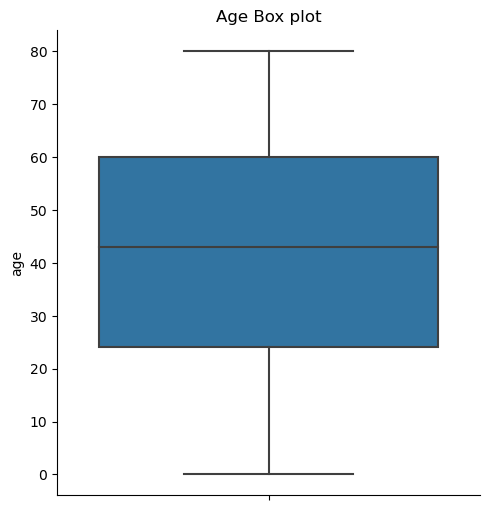

In [11]:
new=sns.catplot(data=df,y='age',kind='box')
new.set(title='Age Box plot')
plt.show()

### Conclusions
- No missing values
- No outliers

#### Univariate analysis on HbA1c_level

In [12]:
df['HbA1c_level'].describe()

count    100000.000000
mean          5.527507
std           1.070672
min           3.500000
25%           4.800000
50%           5.800000
75%           6.200000
max           9.000000
Name: HbA1c_level, dtype: float64

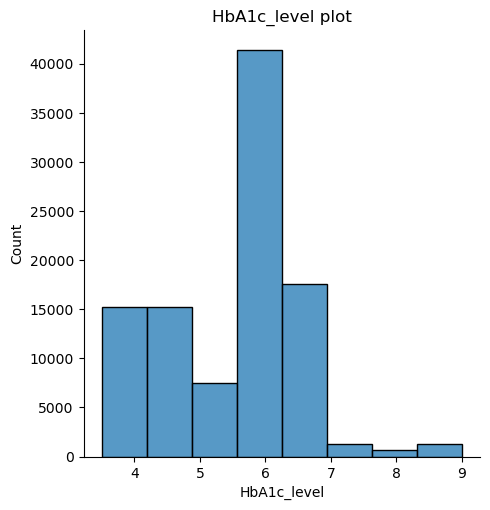

In [13]:
new=sns.displot(data=df,x='HbA1c_level',kind='hist',bins=8)
new.set(title='HbA1c_level plot')
plt.show()

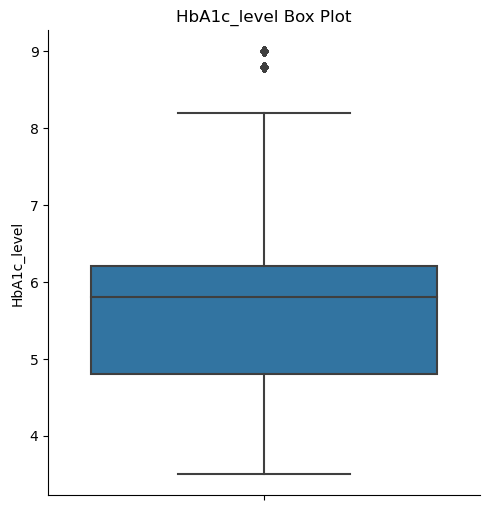

In [14]:
new=sns.catplot(data=df,y='HbA1c_level',kind='box')
new.set(title='HbA1c_level Box Plot')
plt.show()

In [15]:
#Analysing outliers:
len(df[df['HbA1c_level']>8.1])/len(df['HbA1c_level']) *100

1.976

### Conclusion
- No null values
- Has Outliers
- almost 2% have high HbA1c_level

#### Univariate analysis on bmi

In [16]:
df['bmi'].describe()

count    100000.000000
mean         27.320767
std           6.636783
min          10.010000
25%          23.630000
50%          27.320000
75%          29.580000
max          95.690000
Name: bmi, dtype: float64

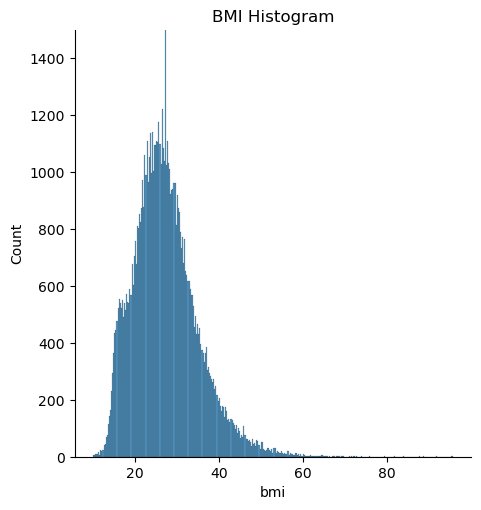

In [17]:
new=sns.displot(data=df,x='bmi',kind='hist')
plt.ylim(0,1500)
new.set(title='BMI Histogram')
plt.show()

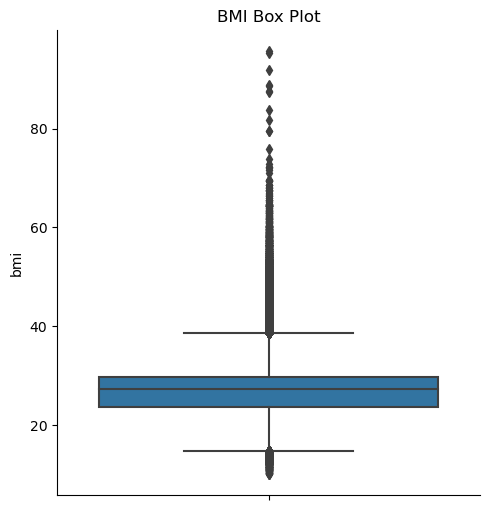

In [18]:
new=sns.catplot(data=df,y='bmi',kind='box')
new.set(title='BMI Box Plot')
plt.show()

In [19]:
(len(df[df['bmi']>40]) + len(df[df['bmi']<15])) /len(df['bmi'])*100

6.069

### Conclusion
- No null/missing values
- Has outliers
- about 6% of total data are outliers

#### Univariate analysis on blood_glucose_level

In [20]:
df['blood_glucose_level'].describe()

count    100000.000000
mean        138.058060
std          40.708136
min          80.000000
25%         100.000000
50%         140.000000
75%         159.000000
max         300.000000
Name: blood_glucose_level, dtype: float64

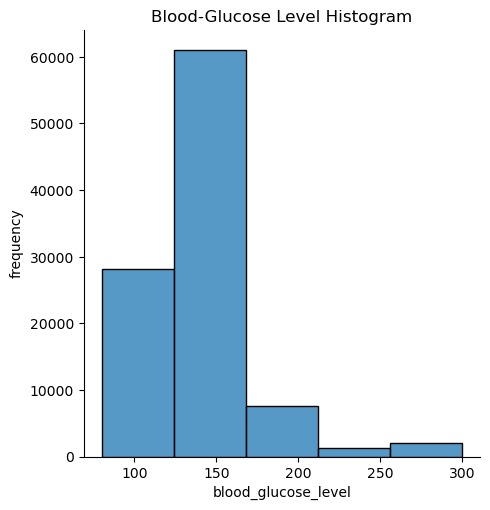

In [21]:
new=sns.displot(df,x='blood_glucose_level',kind='hist',bins=5)
new.set(title='Blood-Glucose Level Histogram',ylabel='frequency')
plt.show()

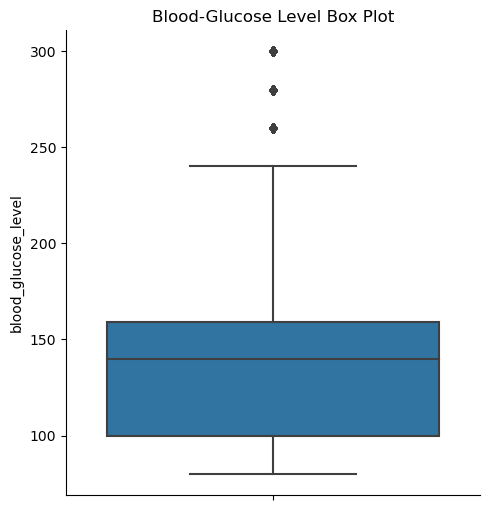

In [22]:
new=sns.catplot(data=df,y='blood_glucose_level',kind='box')
new.set(title='Blood-Glucose Level Box Plot')
plt.show()

In [23]:
len(df[df['blood_glucose_level']>250])/len(df) *100

2.038

### Conclusion
- No null/missing values
- Has outliers
- almost 2% of total have high blood_glucose_level

### Countplots Categorical Data

In [24]:
# hypertension, heart_disease,diabetes, gender, smoking_history

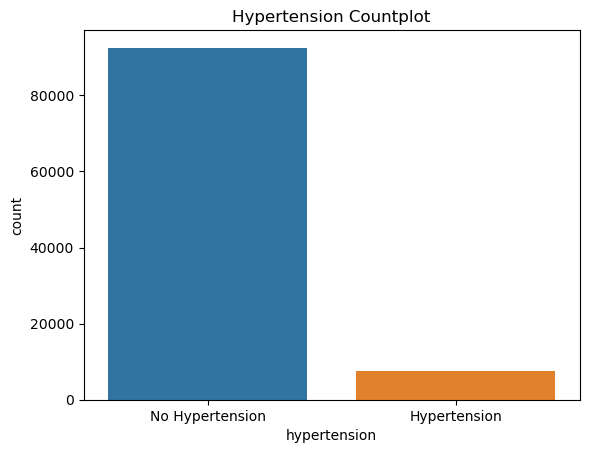

In [25]:
new=sns.countplot(data=df,x='hypertension')
new.set(title='Hypertension Countplot')
new.set_xticklabels(['No Hypertension','Hypertension'])
plt.show()

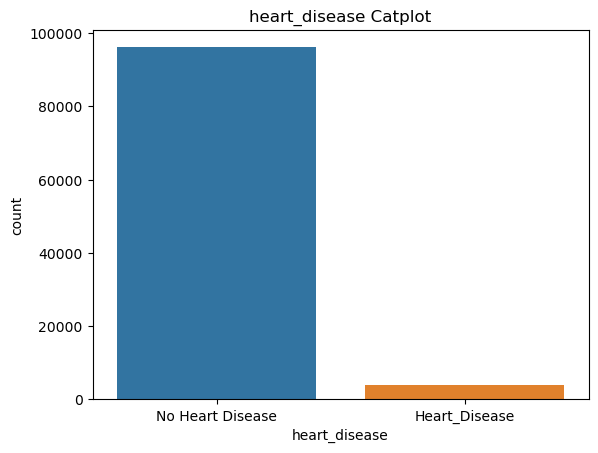

In [26]:
new=sns.countplot(data=df,x='heart_disease')
new.set(title='heart_disease Catplot')
new.set_xticklabels(['No Heart Disease','Heart_Disease'])
plt.show()

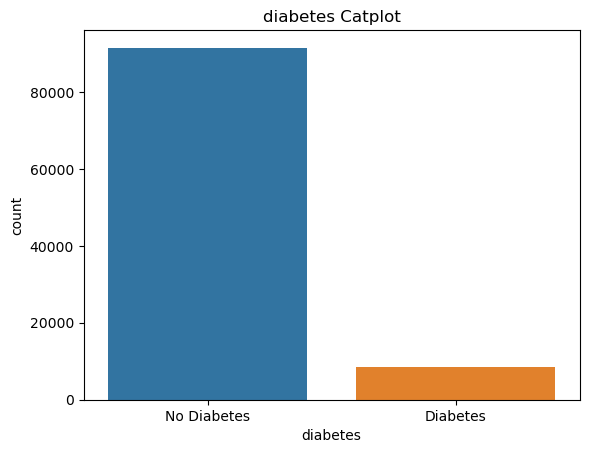

In [27]:
new=sns.countplot(data=df,x='diabetes')
new.set(title='diabetes Catplot')
new.set_xticklabels(['No Diabetes','Diabetes'])
plt.show()

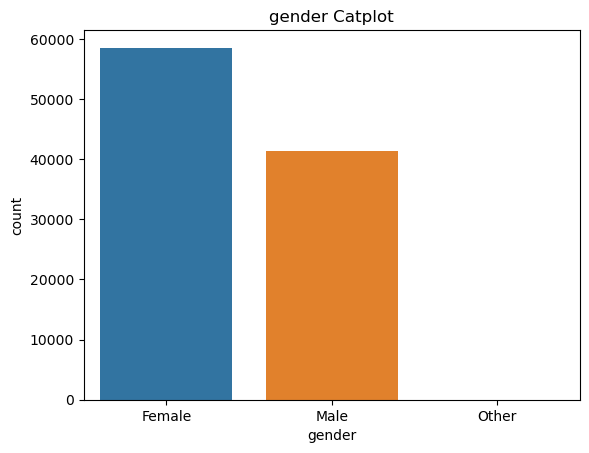

In [28]:
new=sns.countplot(data=df,x='gender')
new.set(title='gender Catplot')
plt.show()

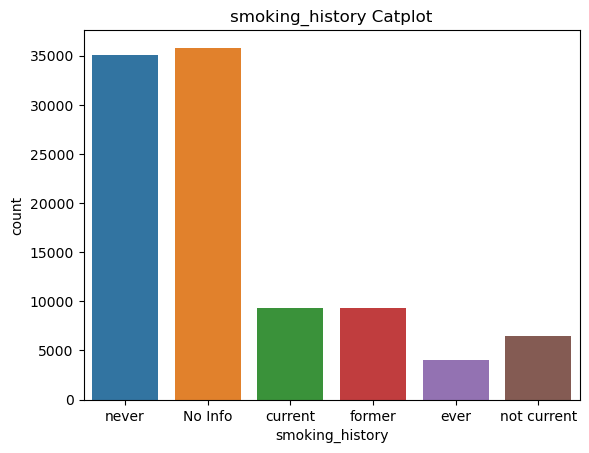

In [29]:
new=sns.countplot(data=df,x='smoking_history')
new.set(title='smoking_history Catplot')
plt.show()

## Bi-variate Analysis

### Age and Diabetes

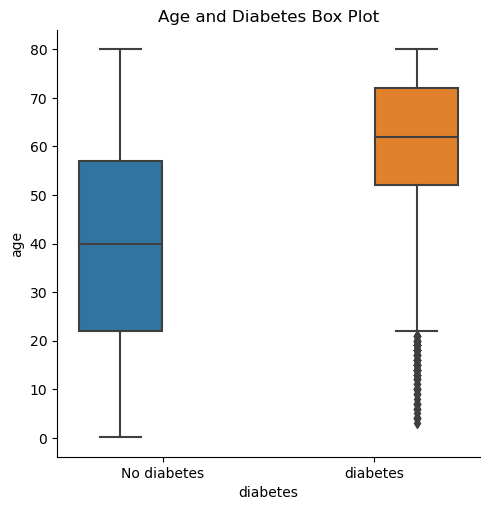

In [30]:
new=sns.catplot(data=df,x='diabetes',y='age',kind='box',hue='diabetes')
new.set(title='Age and Diabetes Box Plot')
new.set_xticklabels(['No diabetes','diabetes'])
plt.show()

### Conclusion
- Diabetes tends to affect older people generally

### BMI and Diabetes 

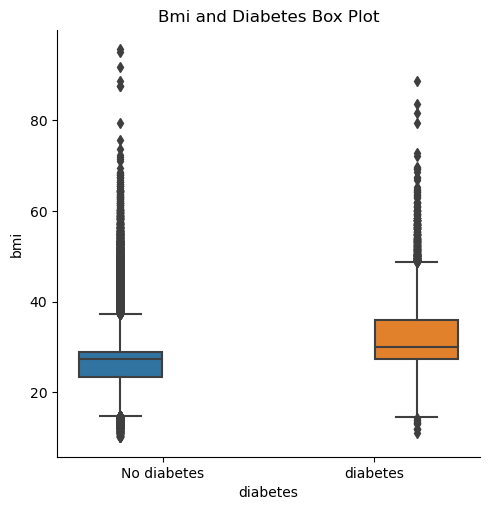

In [31]:
new=sns.catplot(data=df,x='diabetes',y='bmi',kind='box',hue='diabetes')
new.set(title='Bmi and Diabetes Box Plot')
new.set_xticklabels(['No diabetes','diabetes'])
plt.show()

### Conclusion
- As bmi increase theres also a chance of increase in diabetes

### HbA1c_level and Diabetes

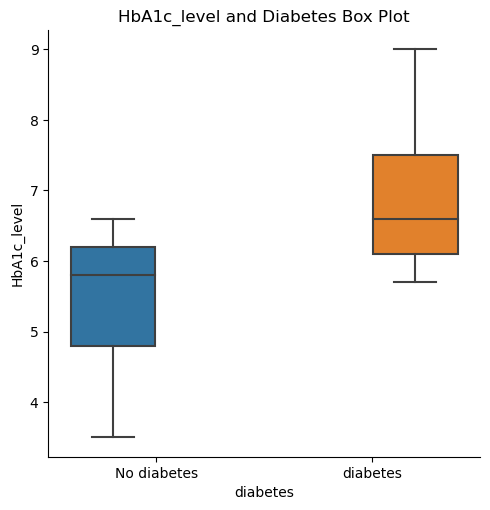

In [32]:
new=sns.catplot(data=df,x='diabetes',y='HbA1c_level',kind='box',hue='diabetes')
new.set(title='HbA1c_level and Diabetes Box Plot')
new.set_xticklabels(['No diabetes','diabetes'])
plt.show()

### Conclusion
- People with low HbA1c_level have less chances of diabetes
- People with high HbA1c_level have high chances of diabetes


### Blood_glucose_level  and diabetes

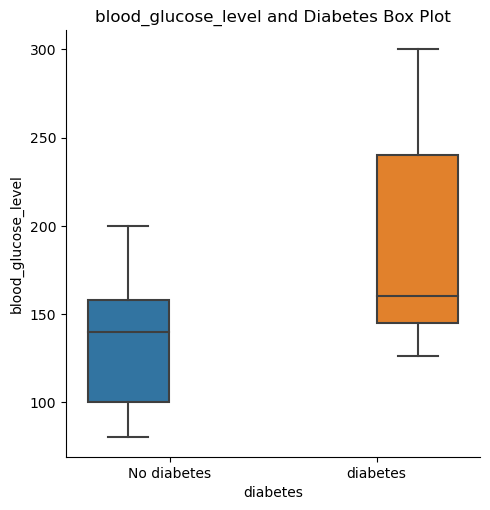

In [33]:
new=sns.catplot(data=df,x='diabetes',y='blood_glucose_level',kind='box',hue='diabetes')
new.set(title='blood_glucose_level and Diabetes Box Plot')
new.set_xticklabels(['No diabetes','diabetes'])
plt.show()

### Conclusion
- with increase in blood glucose level, the chance of diabetes increases
- the people with diabetes have a blood glucose level of around 160 on average

### Multi-variate analysis

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [35]:
df_num=df.select_dtypes(include=['int64','float64'])
df_num.corr()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.251171,0.233354,0.337396,0.101354,0.110672,0.258008
hypertension,0.251171,1.000000,0.121262,0.147666,0.080939,0.084429,0.197823
heart_disease,0.233354,0.121262,1.000000,0.061198,0.067589,0.070066,0.171727
bmi,0.337396,0.147666,0.061198,1.000000,0.082997,0.091261,0.214357
HbA1c_level,0.101354,0.080939,0.067589,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.110672,0.084429,0.070066,0.091261,0.166733,1.000000,0.419558
diabetes,0.258008,0.197823,0.171727,0.214357,0.400660,0.419558,1.000000


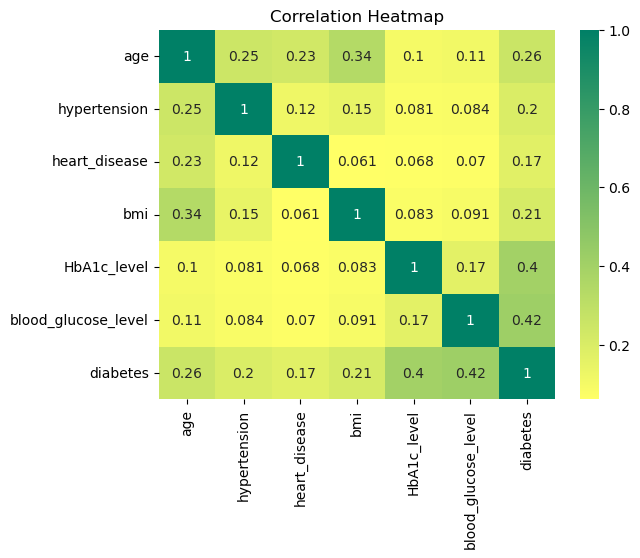

In [36]:
new=sns.heatmap(data=df_num.corr(),annot=True,cmap='summer_r')
new.set(title='Correlation Heatmap')
plt.show()

## END OF ANALYSIS


--------------------------------------------------------------------------------

# ML Model Building

In [37]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [39]:
def hasNull(data):
    missing=data.columns[data.isnull().any()].tolist()
    return missing
if hasNull(df)==[]:
    print("No null values")
else:
    print(hasNull(df))

No null values


- No null/missing values

In [40]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [41]:
df_num=df.select_dtypes(include=['int64','float64']) #Numerical items
df_category=df.select_dtypes(include=['object']) #Categorical items

In [42]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age                  100000 non-null  float64
 1   hypertension         100000 non-null  int64  
 2   heart_disease        100000 non-null  int64  
 3   bmi                  100000 non-null  float64
 4   HbA1c_level          100000 non-null  float64
 5   blood_glucose_level  100000 non-null  int64  
 6   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 5.3 MB


In [43]:
df_category.nunique()

gender             3
smoking_history    6
dtype: int64

In [44]:
df_category['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [45]:
df_category['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [46]:
#performing Label Encoding
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df_category['new_gender']=encoder.fit_transform(df_category['gender'])
df_category['new_smoking_history']=encoder.fit_transform(df_category['smoking_history'])

In [47]:
df_category=df_category.drop(['gender','smoking_history'],axis=1)

In [48]:
df_category.head()

,new_gender,new_smoking_history
0,0,4
1,0,0
2,1,4
3,0,1
4,1,1


In [49]:
df_num['diabetes'].value_counts()
#imbalanced

0    91500
1     8500
Name: diabetes, dtype: int64

In [50]:
total_df=pd.concat([df_num,df_category],axis=1)

In [51]:
total_df.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,new_gender,new_smoking_history
0,80.0,0,1,25.19,6.6,140,0,0,4
1,54.0,0,0,27.32,6.6,80,0,0,0
2,28.0,0,0,27.32,5.7,158,0,1,4
3,36.0,0,0,23.45,5.0,155,0,0,1
4,76.0,1,1,20.14,4.8,155,0,1,1


In [52]:
y=total_df['diabetes'] #target variable

In [53]:
X=total_df.drop('diabetes',axis=1) 

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2) 

In [55]:
y_train.head()

93333    0
9384     0
2573     0
52312    0
69049    0
Name: diabetes, dtype: int64

In [56]:
X_train.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,new_gender,new_smoking_history
93333,80.0,0,0,29.67,5.0,140,0,3
9384,57.0,0,0,16.99,6.6,155,0,3
2573,20.0,0,0,19.99,5.7,90,0,4
52312,40.0,0,0,20.75,6.2,90,1,4
69049,60.0,0,0,33.11,6.1,145,0,4


In [57]:
X_test

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,new_gender,new_smoking_history
15999,9.0,0,0,23.93,5.8,85,1,0
27382,3.0,0,0,16.70,6.6,126,1,0
50072,7.0,0,0,15.00,5.7,130,0,0
55736,74.0,1,0,27.32,6.6,280,0,0
81993,80.0,0,0,27.32,5.8,85,1,4
...,...,...,...,...,...,...,...,...
84832,21.0,0,0,22.76,6.0,140,0,4
28954,50.0,0,0,27.32,5.7,160,1,4
27845,25.0,0,0,27.32,5.8,80,1,4
6096,3.0,0,0,27.32,6.0,130,0,0


In [58]:
y_test

15999    0
27382    0
50072    0
55736    1
81993    0
        ..
84832    0
28954    0
27845    0
6096     0
76085    0
Name: diabetes, Length: 20000, dtype: int64

In [59]:
X_train.shape[1]

8

In [60]:
#RFE 8->5 
#random forest
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
rfe=RFE(RF,n_features_to_select=5,verbose=21)
rfe.fit(X_train,y_train)
ranks=rfe.ranking_
ranks

Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.


array([1, 2, 3, 1, 1, 1, 4, 1])

In [61]:
rfe_selected=[]
n=len(X_train.columns)
for i in range(n):
    if ranks[i]==1:
        rfe_selected.append(X_train.columns[i])
rfe_selected


['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'new_smoking_history']

In [62]:
X_train=X_train[rfe_selected]
X_test=X_test[rfe_selected]


In [63]:
X_train #5features

,age,bmi,HbA1c_level,blood_glucose_level,new_smoking_history
93333,80.0,29.67,5.0,140,3
9384,57.0,16.99,6.6,155,3
2573,20.0,19.99,5.7,90,4
52312,40.0,20.75,6.2,90,4
69049,60.0,33.11,6.1,145,4
...,...,...,...,...,...
79818,26.0,18.79,3.5,200,2
3842,80.0,29.55,5.0,80,4
34561,67.0,32.55,4.5,160,4
24840,80.0,34.33,6.1,220,0


In [64]:
X_test #5features

,age,bmi,HbA1c_level,blood_glucose_level,new_smoking_history
15999,9.0,23.93,5.8,85,0
27382,3.0,16.70,6.6,126,0
50072,7.0,15.00,5.7,130,0
55736,74.0,27.32,6.6,280,0
81993,80.0,27.32,5.8,85,4
...,...,...,...,...,...
84832,21.0,22.76,6.0,140,4
28954,50.0,27.32,5.7,160,4
27845,25.0,27.32,5.8,80,4
6096,3.0,27.32,6.0,130,0


In [65]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(n_estimators=10,max_depth=10)
rf_model.fit(X_train,y_train)


RandomForestClassifier(max_depth=10, n_estimators=10)

In [66]:
pred=rf_model.predict(X_test)

In [67]:
#RFE & RF

from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
accuracy_score(y_test,pred)

0.9728

In [68]:
search_para_RF={'n_estimators':[10,20,30],'max_depth':[10,20,30]}

In [69]:
#Grid Search cv

from sklearn.model_selection import GridSearchCV
RF=RandomForestClassifier()
GS=GridSearchCV(RF,search_para_RF,cv=5,verbose=10)
GS.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START max_depth=10, n_estimators=10...............................
[CV 1/5; 1/9] END max_depth=10, n_estimators=10;, score=0.972 total time=   0.7s
[CV 2/5; 1/9] START max_depth=10, n_estimators=10...............................
[CV 2/5; 1/9] END max_depth=10, n_estimators=10;, score=0.971 total time=   0.7s
[CV 3/5; 1/9] START max_depth=10, n_estimators=10...............................
[CV 3/5; 1/9] END max_depth=10, n_estimators=10;, score=0.971 total time=   0.6s
[CV 4/5; 1/9] START max_depth=10, n_estimators=10...............................
[CV 4/5; 1/9] END max_depth=10, n_estimators=10;, score=0.972 total time=   0.6s
[CV 5/5; 1/9] START max_depth=10, n_estimators=10...............................
[CV 5/5; 1/9] END max_depth=10, n_estimators=10;, score=0.972 total time=   0.5s
[CV 1/5; 2/9] START max_depth=10, n_estimators=20...............................
[CV 1/5; 2/9] END max_depth=10, n_estimators=20;,

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30],
                         'n_estimators': [10, 20, 30]},
             verbose=10)

In [70]:
GS.best_estimator_

RandomForestClassifier(max_depth=10, n_estimators=30)

In [71]:
gs_pred_RF=GS.predict(X_test)

In [72]:
from sklearn.metrics import roc_curve,auc,roc_auc_score
acc = accuracy_score(y_test, gs_pred_RF)
prec = precision_score(y_test, gs_pred_RF)
rec = recall_score(y_test, gs_pred_RF)
f1 = f1_score(y_test, gs_pred_RF)
roc=roc_auc_score(y_test,gs_pred_RF)

In [73]:
print(f"Accuracy :{acc:.3f}")
print(f"F1 score: {f1:.3f}")
print(f"Precision score: {prec:.3f}")
print(f"Recall score: {rec:.3f}")
print(f"ROC: {roc:.3f}")

Accuracy :0.973
F1 score: 0.809
Precision score: 1.000
Recall score: 0.679
ROC: 0.840


In [74]:
#rfe_selected with Decision Trees

from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier(max_depth=9)
DT.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=9)

In [75]:
pred=DT.predict(X_test)


In [76]:
accuracy_score(pred,y_test)

0.9728

In [77]:
search_para_DT={'max_depth':[10,15,20],
            'criterion':['gini','entropy']}

In [78]:
#Grid Search cv
from sklearn.model_selection import GridSearchCV
DT=DecisionTreeClassifier()
GS=GridSearchCV(DT,search_para_DT,cv=5,verbose=10)
GS.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START criterion=gini, max_depth=10................................
[CV 1/5; 1/6] END .criterion=gini, max_depth=10;, score=0.972 total time=   0.2s
[CV 2/5; 1/6] START criterion=gini, max_depth=10................................
[CV 2/5; 1/6] END .criterion=gini, max_depth=10;, score=0.971 total time=   0.1s
[CV 3/5; 1/6] START criterion=gini, max_depth=10................................
[CV 3/5; 1/6] END .criterion=gini, max_depth=10;, score=0.971 total time=   0.1s
[CV 4/5; 1/6] START criterion=gini, max_depth=10................................
[CV 4/5; 1/6] END .criterion=gini, max_depth=10;, score=0.972 total time=   0.2s
[CV 5/5; 1/6] START criterion=gini, max_depth=10................................
[CV 5/5; 1/6] END .criterion=gini, max_depth=10;, score=0.971 total time=   0.1s
[CV 1/5; 2/6] START criterion=gini, max_depth=15................................
[CV 1/5; 2/6] END .criterion=gini, max_depth=15;,

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20]},
             verbose=10)

In [79]:
GS.best_estimator_

DecisionTreeClassifier(max_depth=10)

In [80]:
gs_pred_DT=GS.predict(X_test)

In [81]:
acc = accuracy_score(y_test, gs_pred_DT)
prec = precision_score(y_test, gs_pred_DT)
rec = recall_score(y_test, gs_pred_DT)
f1 = f1_score(y_test, gs_pred_DT)
roc=roc_auc_score(y_test,gs_pred_DT)

In [82]:
print(f"Accuracy :{acc:.3f}")
print(f"F1 score: {f1:.3f}")
print(f"Precision score: {prec:.3f}")
print(f"Recall score: {rec:.3f}")
print(f"ROC: {roc:.3f}")

Accuracy :0.972
F1 score: 0.810
Precision score: 0.973
Recall score: 0.693
ROC: 0.846


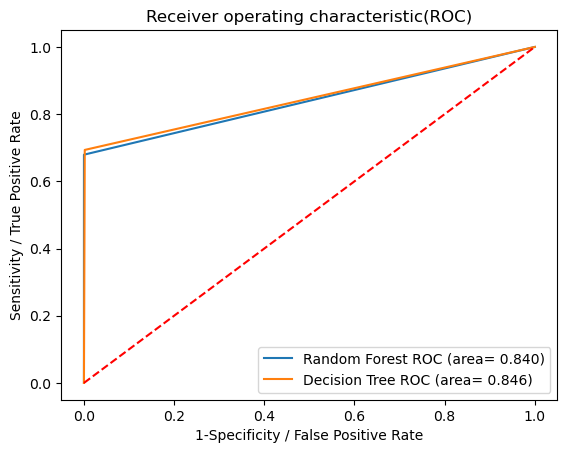

In [83]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,auc

RF_fpr,RF_tpr,threshold=roc_curve(y_test,gs_pred_RF)
auc_RF=auc(RF_fpr,RF_tpr)

DT_fpr,DT_tpr,threshold=roc_curve(y_test,gs_pred_DT)
auc_DT=auc(DT_fpr,DT_tpr)

plt.plot(RF_fpr,RF_tpr,linestyle='-',label=f'Random Forest ROC (area= {auc_RF:.3f})')
plt.plot(DT_fpr,DT_tpr,linestyle='-',label=f'Decision Tree ROC (area= {auc_DT:.3f})')

plt.plot([0, 1], [0, 1],'r--')
plt.title(label='Receiver operating characteristic(ROC)')
plt.xlabel(xlabel='1-Specificity / False Positive Rate')
plt.ylabel(ylabel='Sensitivity / True Positive Rate')

plt.legend(loc="lower right")
plt.show()

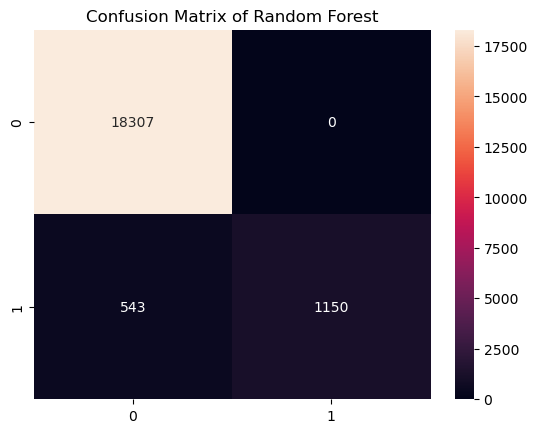

In [84]:
#confusion matrix for Random Forest
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,gs_pred_RF)
a=sns.heatmap(cm,annot=True,fmt='d')
a.set(title='Confusion Matrix of Random Forest')

plt.show()

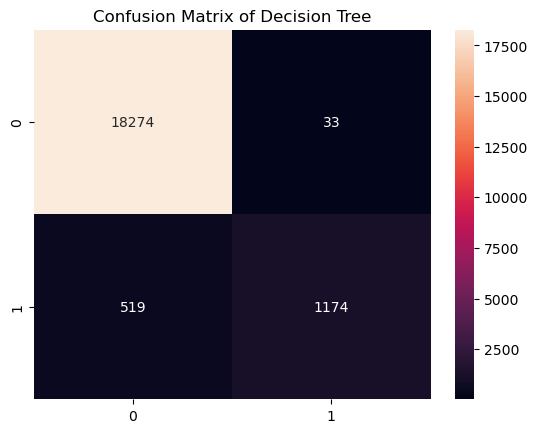

In [85]:
#confusion matrix for Decision Tree
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,gs_pred_DT)
a=sns.heatmap(cm,annot=True,fmt='d')
a.set(title='Confusion Matrix of Decision Tree')

plt.show()

In [86]:
df_imp=pd.DataFrame({'features':X_train.columns,'imortances':GS.best_estimator_.feature_importances_})

df_imp=df_imp.sort_values(by='imortances',ascending=False)

df_imp

,features,imortances
2,HbA1c_level,0.634023
3,blood_glucose_level,0.322418
1,bmi,0.020782
0,age,0.019591
4,new_smoking_history,0.003186


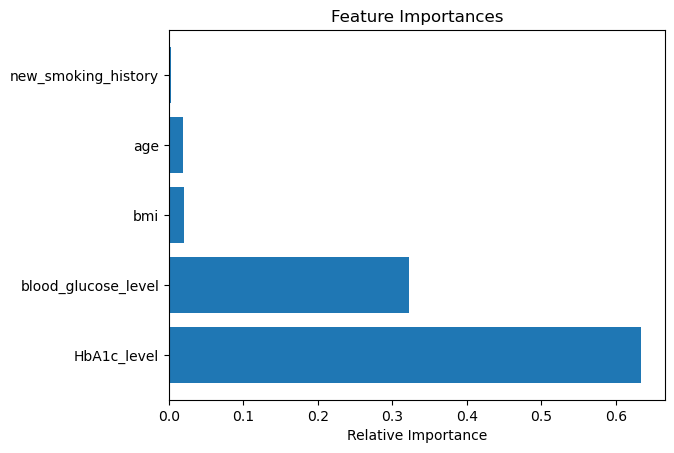

In [87]:
plt.title('Feature Importances')
plt.barh(df_imp['features'], df_imp['imortances'])
plt.yticks(df_imp['features'])
plt.xlabel('Relative Importance')
plt.show()